In [2]:
import pandas as pd 

df = pd.read_csv(r'C:\Users\Admin\OneDrive\Área de Trabalho\Ciência de Dados\2004-2021_limpo.csv')
dfs = pd.read_csv(r'C:\Users\Admin\OneDrive\Área de Trabalho\Ciência de Dados\data\salario_minimo_brasil.csv', sep = ';')

df = df.drop(columns = {df.columns[1], df.columns[5], df.columns[6], df.columns[8], df.columns[9], df.columns[10], df.columns[11]})
df['DATA INICIAL'] = pd.to_datetime(df['DATA INICIAL'], infer_datetime_format=True) 
df = df[df.PRODUTO != 'GLP']
df = df[df.PRODUTO != 'GASOLINA ADITIVADA']

dfs = dfs.drop(columns = {dfs.columns[1], dfs.columns[3], dfs.columns[4], dfs.columns[5]})
dfs['PERIODO_INICIO'] = pd.to_datetime(dfs['PERIODO_INICIO'], infer_datetime_format=True) 
dfs = dfs.rename(columns={dfs.columns[1]: 'SALARIO MINIMO'})

In [3]:
df_ordenado = df.sort_values('PRECO MEDIO REVENDA', ascending=False).iloc[0:15]

In [4]:
df_etanol = df[df['PRODUTO'] == 'ETANOL HIDRATADO']
df_gc = df[df['PRODUTO'] == 'GASOLINA COMUM']
df_od = df[df['PRODUTO'] == 'OLEO DIESEL']
df_ods10 = df[df['PRODUTO'] == 'OLEO DIESEL S10']
df_gnv = df[df['PRODUTO'] == 'GNV']

# ETANOL HIDRATADO

<AxesSubplot:xlabel='DATA INICIAL'>

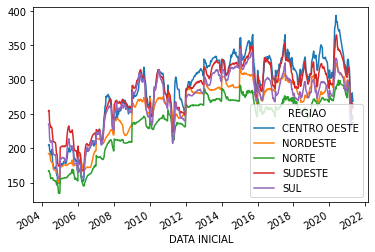

In [5]:
res_etanol = pd.merge(df_etanol.assign(grouper=df_etanol['DATA INICIAL'].dt.to_period('Y')),
               dfs.assign(grouper=dfs['PERIODO_INICIO'].dt.to_period('Y')),
               how='left', on='grouper')
res_etanol = res_etanol.drop(columns = {res_etanol.columns[2], res_etanol.columns[3], res_etanol.columns[5], res_etanol.columns[6]})
res_etanol['SALARIO MINIMO'] = res_etanol['SALARIO MINIMO'].astype(float)

res_etanol["PRECO_REVENDA_POR_SM"] = res_etanol["SALARIO MINIMO"]/res_etanol["PRECO MEDIO REVENDA"]
res_etanol = res_etanol.drop(columns = {res_etanol.columns[2], res_etanol.columns[3]})

res_etanol = res_etanol.groupby(['REGIAO', 'DATA INICIAL']).mean()
res_etanol.squeeze().unstack(level=0).plot()

# GASOLINA COMUM 

<AxesSubplot:xlabel='DATA INICIAL'>

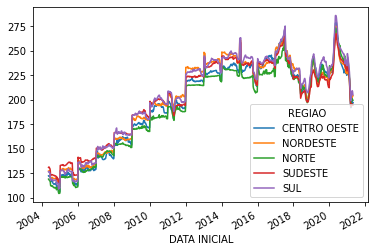

In [6]:
res_gc = pd.merge(df_gc.assign(grouper=df_gc['DATA INICIAL'].dt.to_period('Y')),
               dfs.assign(grouper=dfs['PERIODO_INICIO'].dt.to_period('Y')),
               how='left', on='grouper')

res_gc = res_gc.drop(columns = {res_gc.columns[2], res_gc.columns[3], res_gc.columns[5], res_gc.columns[6]})
res_gc['SALARIO MINIMO'] = res_gc['SALARIO MINIMO'].astype(float)

res_gc["PRECO_REVENDA_POR_SM"] = res_gc["SALARIO MINIMO"]/res_gc["PRECO MEDIO REVENDA"]
res_gc = res_gc.drop(columns = {res_gc.columns[2], res_gc.columns[3]})

res_gc = res_gc.groupby(['REGIAO', 'DATA INICIAL']).mean()
res_gc.squeeze().unstack(level=0).plot()

# OLEO DIESEL

<AxesSubplot:xlabel='DATA INICIAL'>

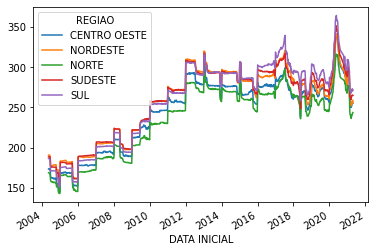

In [7]:
res_od = pd.merge(df_od.assign(grouper=df_od['DATA INICIAL'].dt.to_period('Y')),
               dfs.assign(grouper=dfs['PERIODO_INICIO'].dt.to_period('Y')),
               how='left', on='grouper')

res_od = res_od.drop(columns = {res_od.columns[2], res_od.columns[3], res_od.columns[5], res_od.columns[6]})
res_od['SALARIO MINIMO'] = res_od['SALARIO MINIMO'].astype(float)

res_od["PRECO_REVENDA_POR_SM"] = res_od["SALARIO MINIMO"]/res_od["PRECO MEDIO REVENDA"]
res_od = res_od.drop(columns = {res_od.columns[2], res_od.columns[3]})

res_od = res_od.groupby(['REGIAO', 'DATA INICIAL']).mean()
res_od.squeeze().unstack(level=0).plot()


# OLEO DIESEL S10

<AxesSubplot:xlabel='DATA INICIAL'>

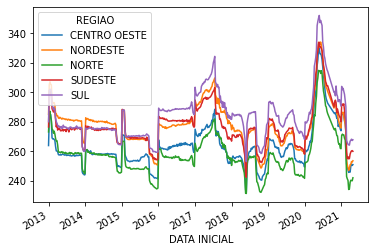

In [8]:
res_ods10 = pd.merge(df_ods10.assign(grouper=df_ods10['DATA INICIAL'].dt.to_period('Y')),
               dfs.assign(grouper=dfs['PERIODO_INICIO'].dt.to_period('Y')),
               how='left', on='grouper')

res_ods10 = res_ods10.drop(columns = {res_ods10.columns[2], res_ods10.columns[3], res_ods10.columns[5], res_ods10.columns[6]})
res_ods10['SALARIO MINIMO'] = res_ods10['SALARIO MINIMO'].astype(float)

res_ods10["PRECO_REVENDA_POR_SM"] = res_ods10["SALARIO MINIMO"]/res_ods10["PRECO MEDIO REVENDA"]
res_ods10 = res_ods10.drop(columns = {res_ods10.columns[2], res_ods10.columns[3]})

res_ods10 = res_ods10.groupby(['REGIAO', 'DATA INICIAL']).mean()
res_ods10.squeeze().unstack(level=0).plot()


# GNV

<AxesSubplot:xlabel='DATA INICIAL'>

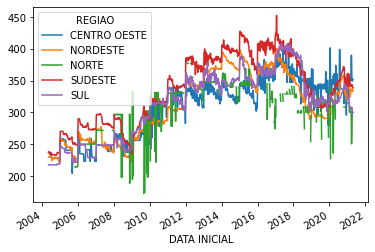

In [9]:
res_gnv = pd.merge(df_gnv.assign(grouper=df_gnv['DATA INICIAL'].dt.to_period('Y')),
               dfs.assign(grouper=dfs['PERIODO_INICIO'].dt.to_period('Y')),
               how='left', on='grouper')

res_gnv = res_gnv.drop(columns = {res_gnv.columns[2], res_gnv.columns[3], res_gnv.columns[5], res_gnv.columns[6]})
res_gnv['SALARIO MINIMO'] = res_gnv['SALARIO MINIMO'].astype(float)

res_gnv["PRECO_REVENDA_POR_SM"] = res_gnv["SALARIO MINIMO"]/res_gnv["PRECO MEDIO REVENDA"]
res_gnv = res_gnv.drop(columns = {res_gnv.columns[2], res_gnv.columns[3]})

res_gnv = res_gnv.groupby(['REGIAO', 'DATA INICIAL']).mean()
res_gnv.squeeze().unstack(level=0).plot()


In [10]:
res_gnv

PRECO_REVENDA_POR_SM
REGIAO       DATA INICIAL                      
CENTRO OESTE 2004-05-09              236.578708
             2004-05-16              236.578708
             2004-05-23              236.578708
             2004-05-30              236.578708
             2004-06-06              236.578708
...                                         ...
SUL          2021-03-28              307.833134
             2021-04-04              307.791559
             2021-04-11              305.648065
             2021-04-18              298.369162
             2021-04-25              299.247547

[3986 rows x 1 columns]

In [11]:
df_gnv

,DATA INICIAL,REGIAO,ESTADO,PRODUTO,PRECO MEDIO REVENDA
36196,2004-05-09,CENTRO OESTE,MS,GNV,1.099
36197,2004-05-09,NORDESTE,AL,GNV,1.084
36198,2004-05-09,NORDESTE,BA,GNV,1.079
36199,2004-05-09,NORDESTE,CE,GNV,1.184
36200,2004-05-09,NORDESTE,PAIBA,GNV,1.149
...,...,...,...,...,...
120764,2021-04-25,NORDESTE,RN,GNV,3.550
120765,2021-04-25,SUL,RS,GNV,4.369
120766,2021-04-25,SUL,SC,GNV,3.485
120767,2021-04-25,SUDESTE,SP,GNV,3.150


In [13]:
df_gnv.groupby(['REGIAO'])['PRODUTO'].count().reset_index(name='total')

,REGIAO,total
0,CENTRO OESTE,1671
1,NORDESTE,6180
2,NORTE,523
3,SUDESTE,3488
4,SUL,2607
